In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings('ignore')

In [2]:
from forecasting_models.univariate_models.arima.model import ARIMAForecastModel
from forecasting_models.univariate_models.lstm.model import LSTMForecastModel
from data_utils.csv_utils import read_timeseries_csv

In [3]:
dataset = read_timeseries_csv("./examples/sample_data/univar_data/cpu_example_5min.csv")

dataset.shape

(4032, 1)

In [4]:
enable_plotting = True
n_splits = 3

In [5]:
lstm_model = LSTMForecastModel("./examples/configs/lstm/lstm_example_24_step.yaml")

** FOLD n.1 **
Training dataset plot:


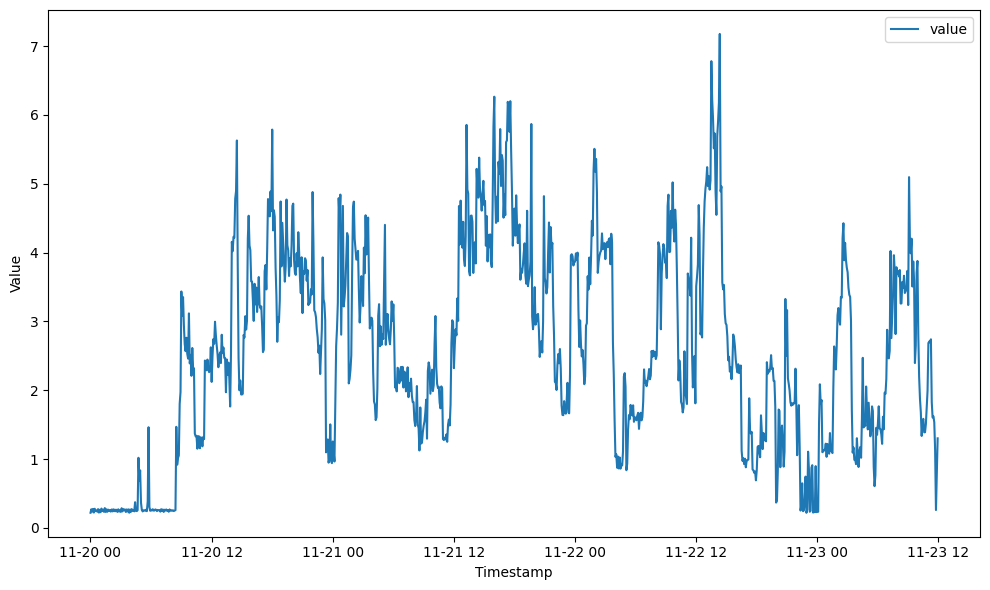

Fold n.1 evaluation result plot:


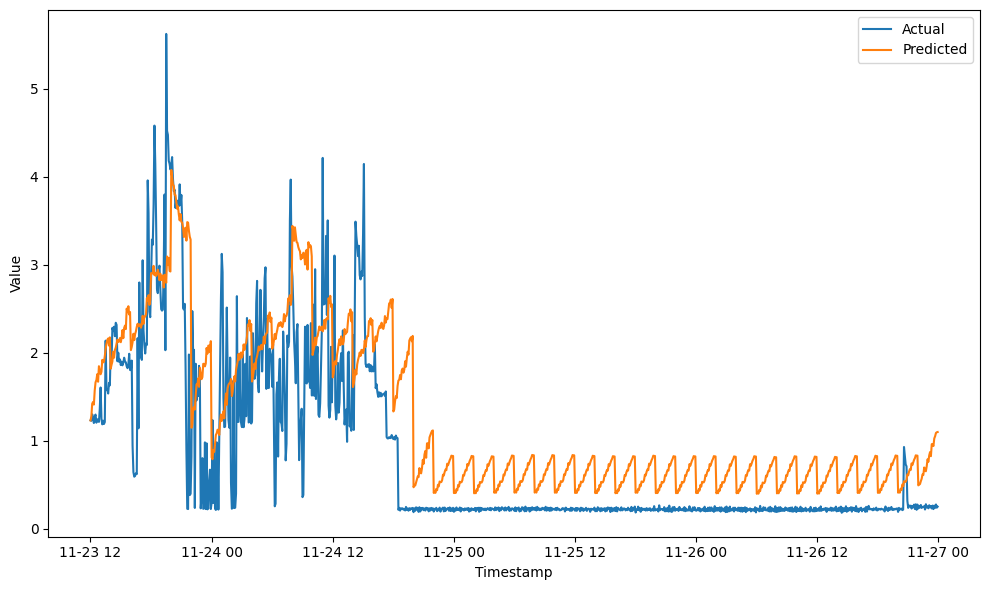

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


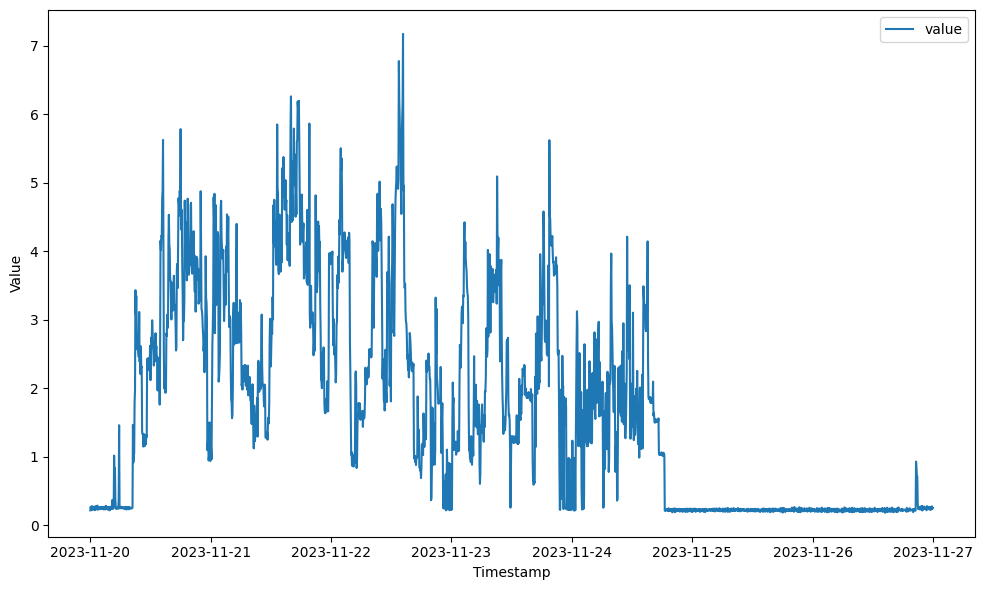

Fold n.2 evaluation result plot:


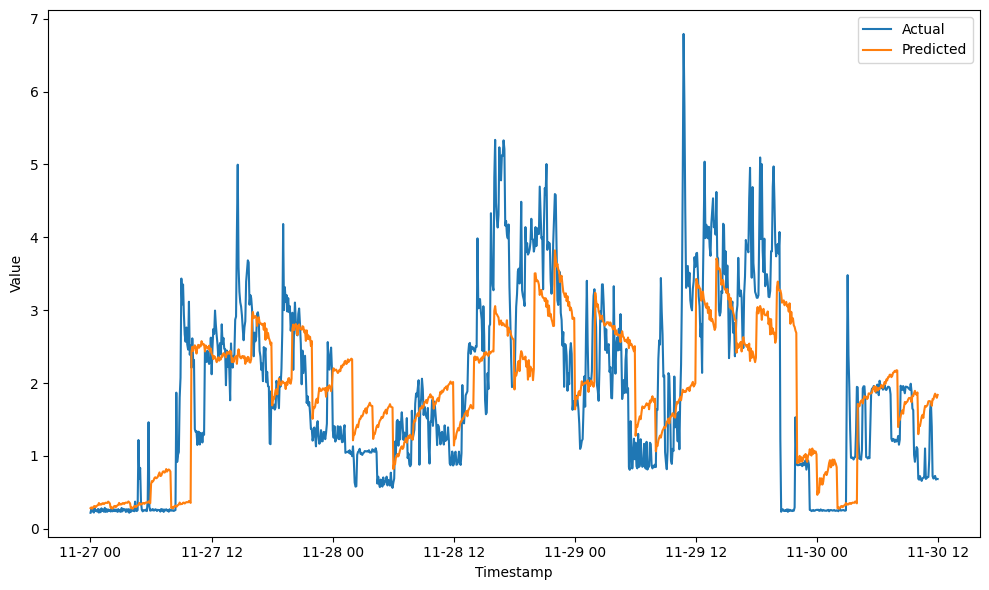

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


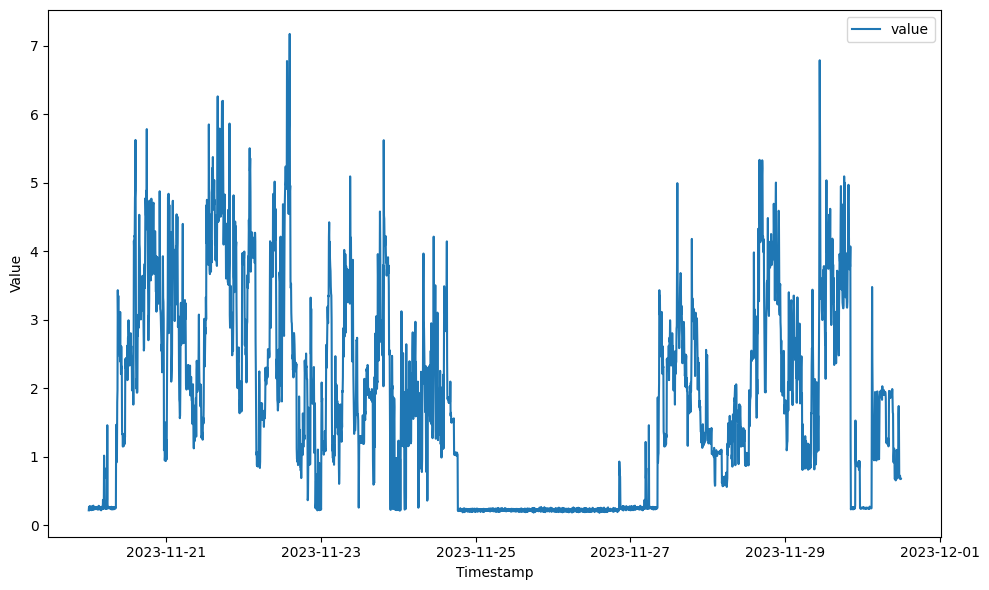

Fold n.3 evaluation result plot:


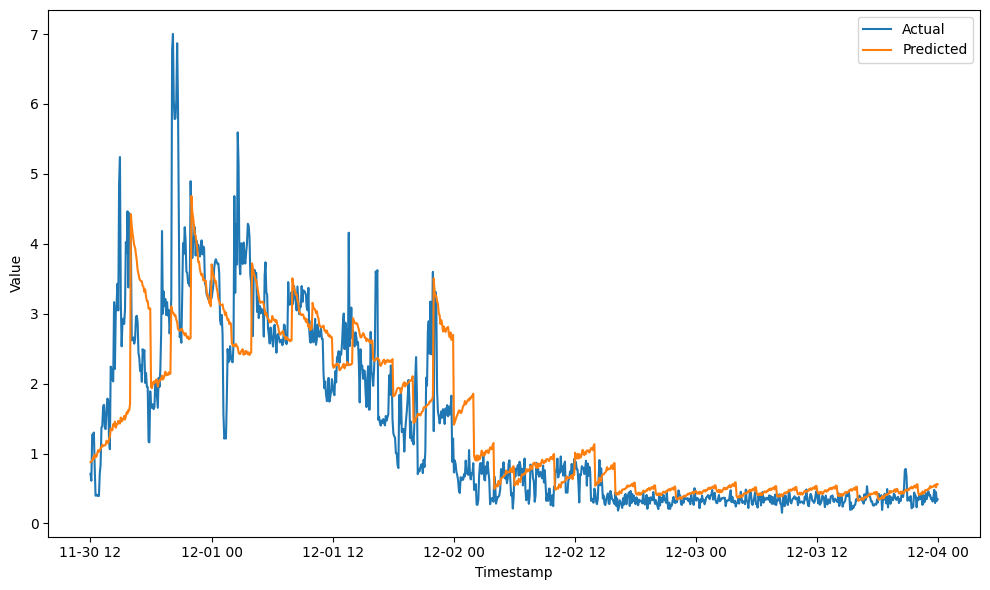

-----------------------------------------



In [6]:
from tensorflow.keras.layers import LSTM
from ts_cross_validation import lstm_eval_ts_cross_validation

lstm_evals_df = lstm_eval_ts_cross_validation(
    lstm_model,
    dataset.copy(),
    custom_inner_layers=[
        LSTM(64),
    ],
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [7]:
lstm_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.713059,0.508453,157.373666,0.553741,0.469284
Fold 2,0.938362,0.880523,67.412529,0.687922,0.450533
Fold 3,0.703390,0.494757,44.968688,0.434818,0.705549


** FOLD n.1 **
Training dataset plot:


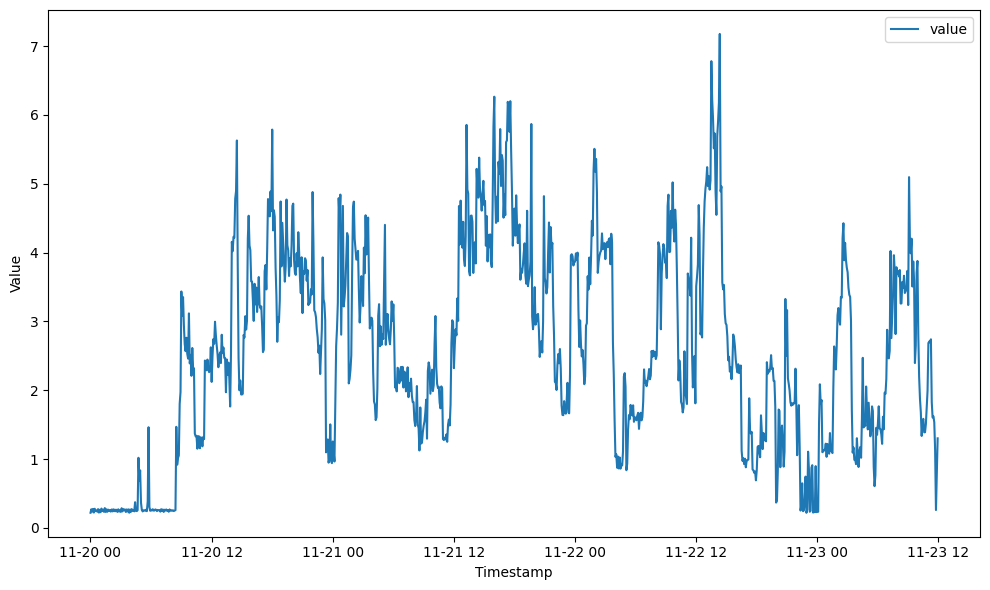

Fold n.1 evaluation result plot:


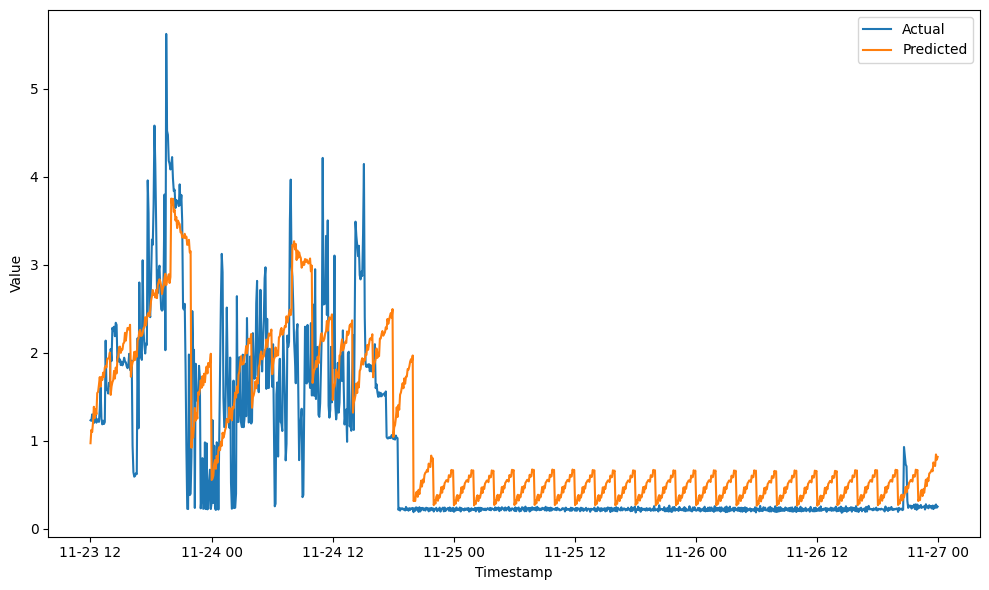

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


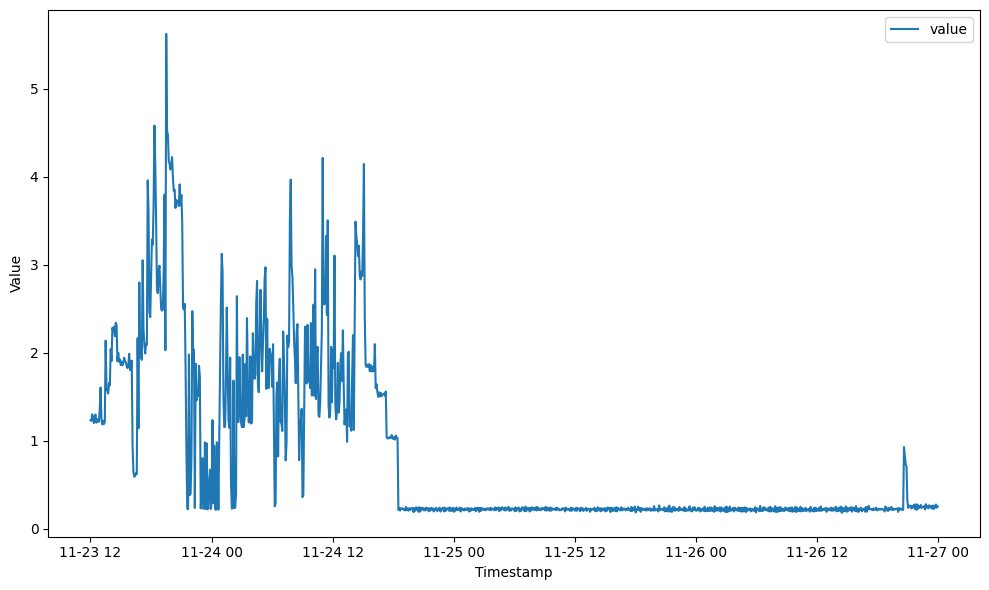

Fold n.2 evaluation result plot:


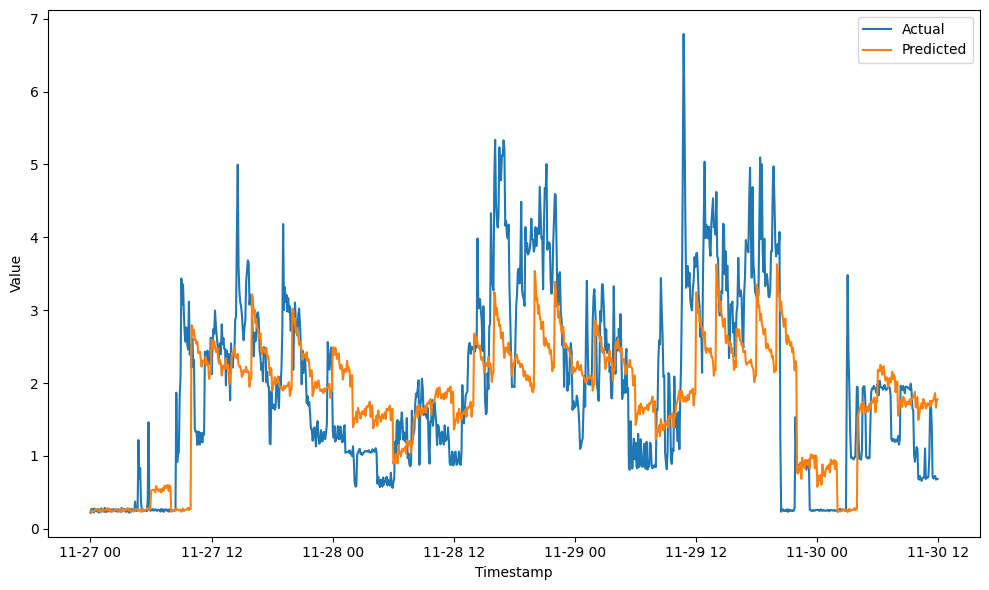

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


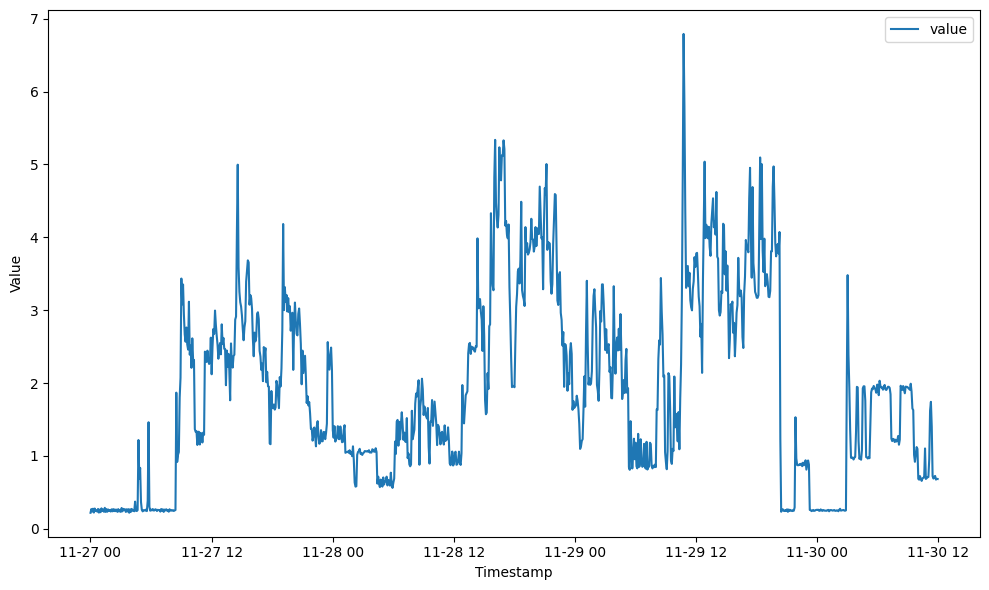

Fold n.3 evaluation result plot:


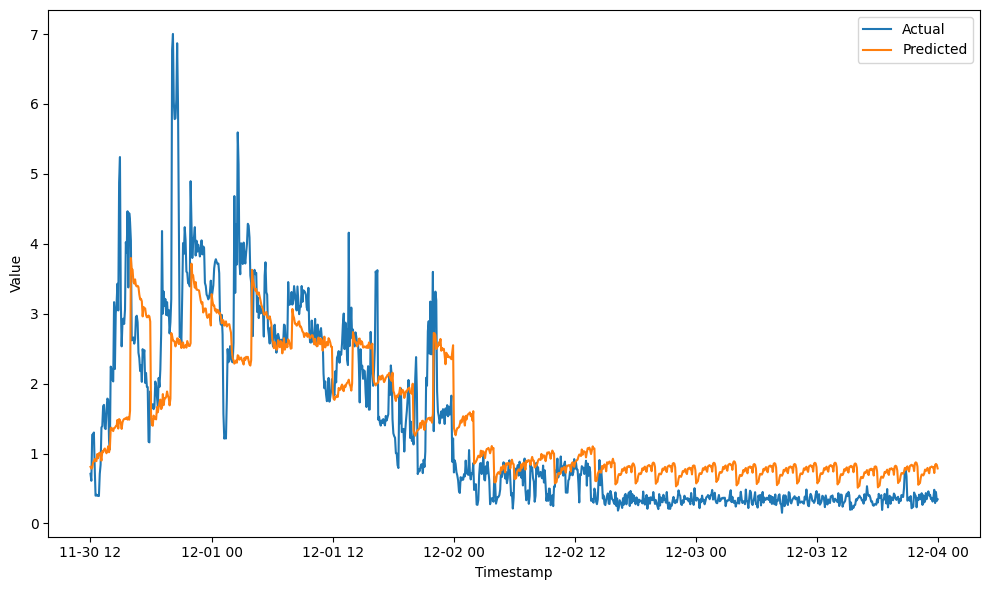

-----------------------------------------



In [8]:
from ts_cross_validation import lstm_eval_rolling_ts_cross_validation


lstm_rolling_evals_df = lstm_eval_rolling_ts_cross_validation(
    lstm_model,
    dataset.copy(),
    custom_inner_layers=[
        LSTM(64),
    ],
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [9]:
lstm_rolling_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.635345,0.403663,111.623830,0.442949,0.578662
Fold 2,0.967077,0.935237,62.022817,0.704605,0.416390
Fold 3,0.752862,0.566802,76.823189,0.544380,0.662672


In [10]:
arima_model = ARIMAForecastModel("./examples/configs/arima/arima_example_24_step.yaml")

** FOLD n.1 **
Training dataset plot:


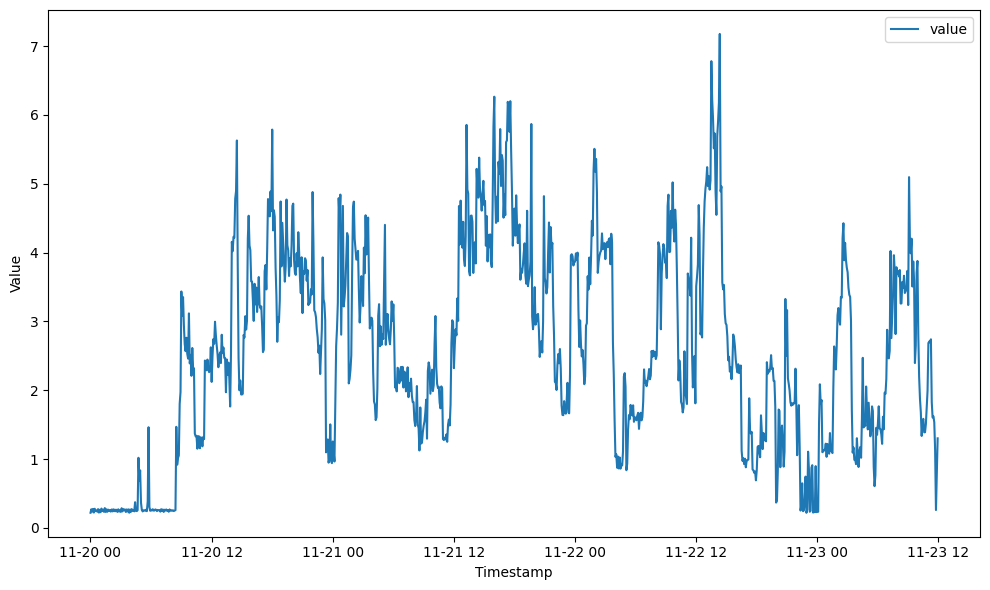

Fold n.1 evaluation result plot:


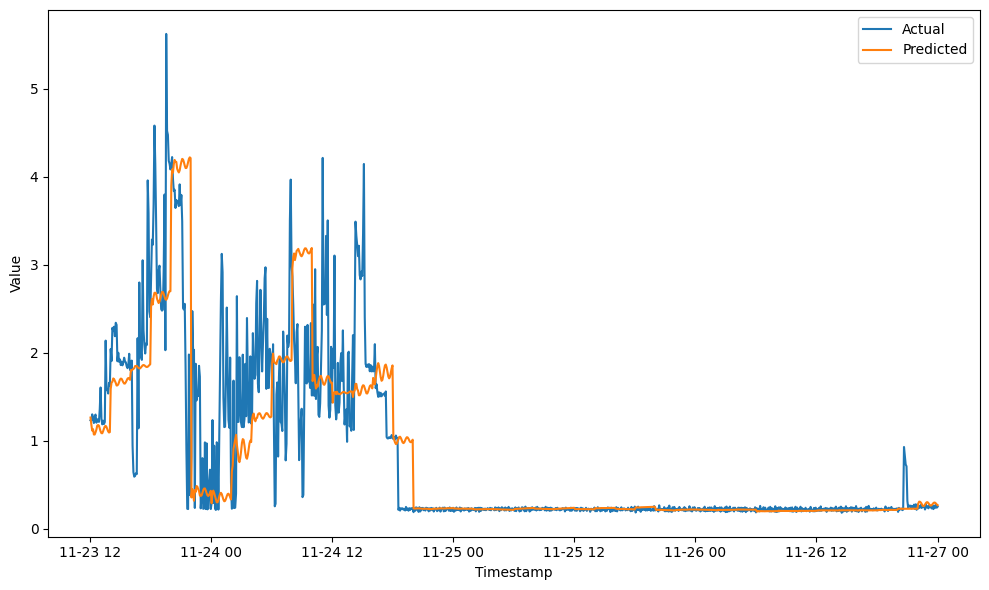

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


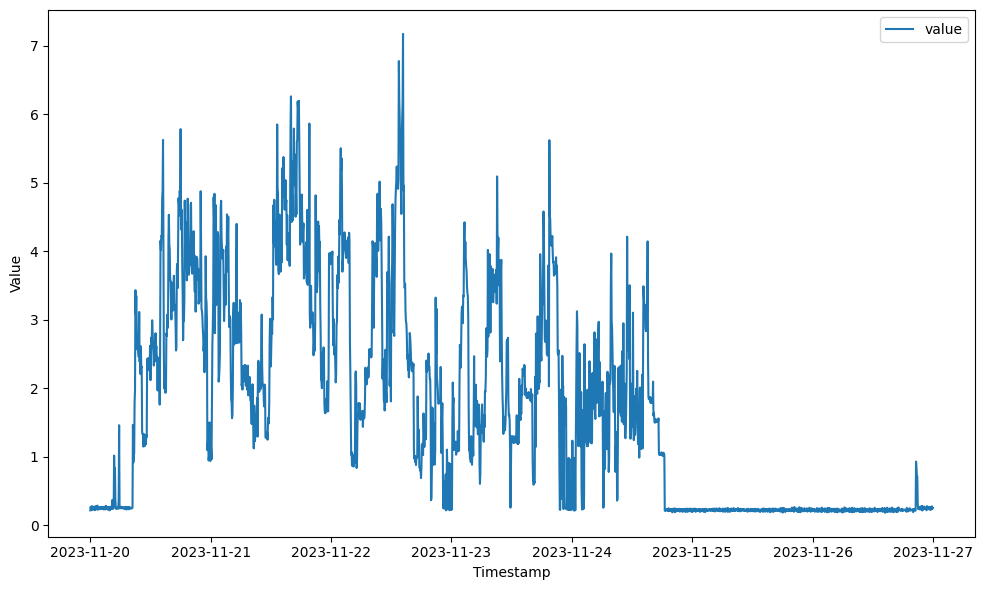

Fold n.2 evaluation result plot:


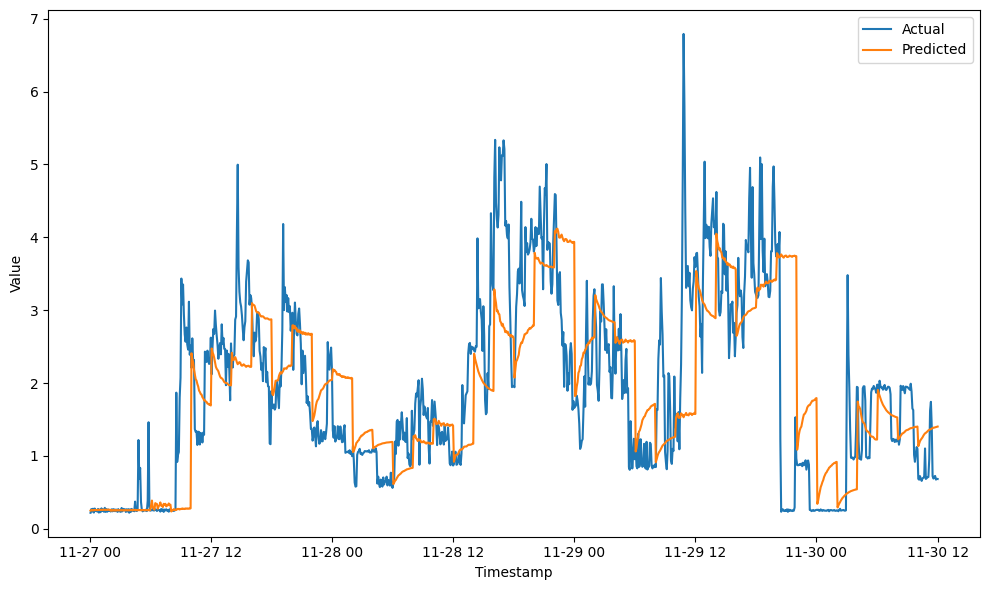

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


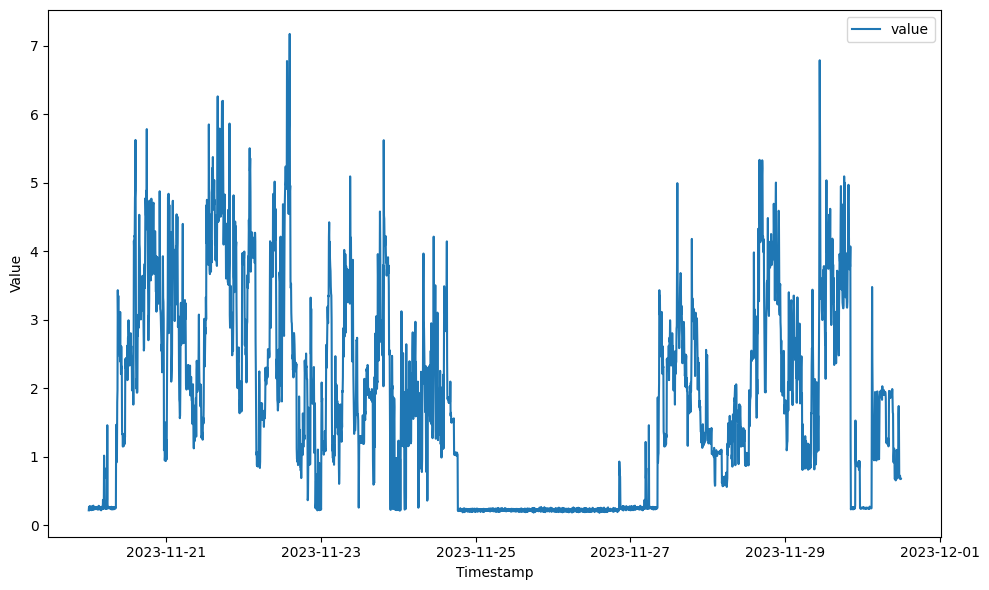

Fold n.3 evaluation result plot:


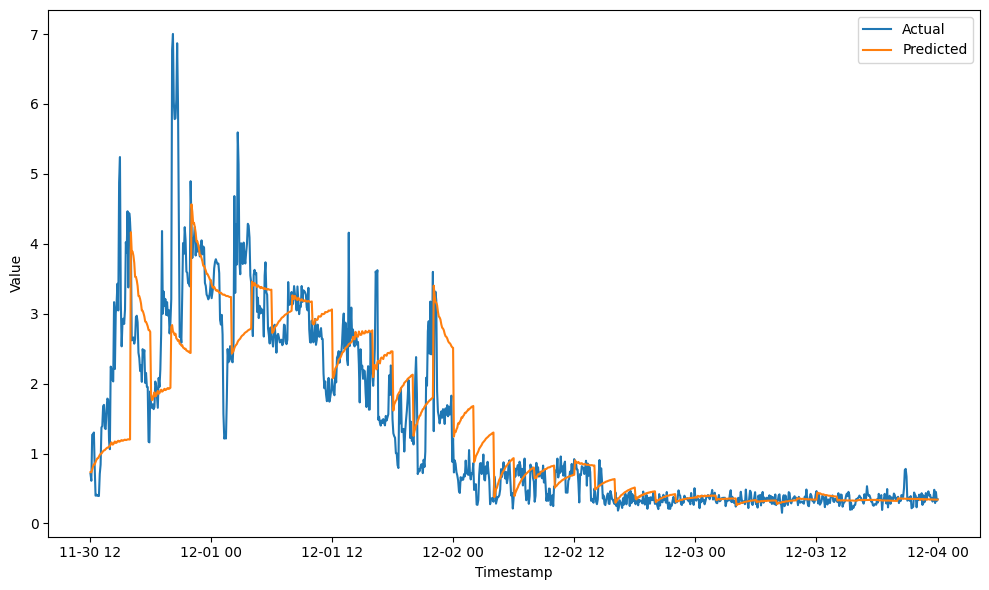

-----------------------------------------



In [11]:
from ts_cross_validation import arima_eval_ts_cross_validation


arima_evals_df = arima_eval_ts_cross_validation(
    arima_model,
    dataset.copy(),
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [12]:
arima_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.628006,0.394391,34.489441,0.294758,0.588340
Fold 2,0.973954,0.948586,66.240061,0.676392,0.408060
Fold 3,0.717749,0.515163,35.269873,0.407719,0.693404


** FOLD n.1 **
Training dataset plot:


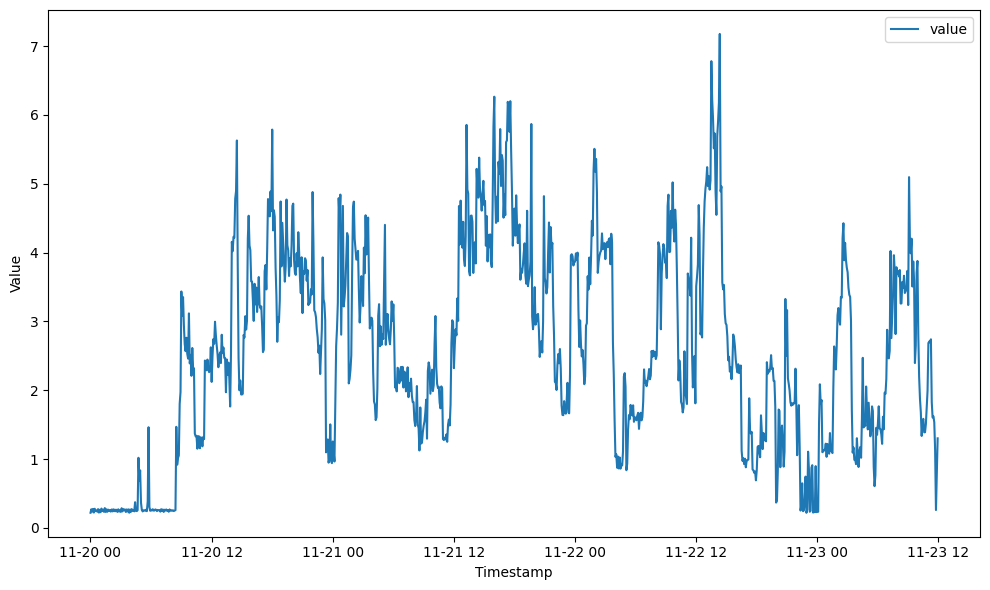

Fold n.1 evaluation result plot:


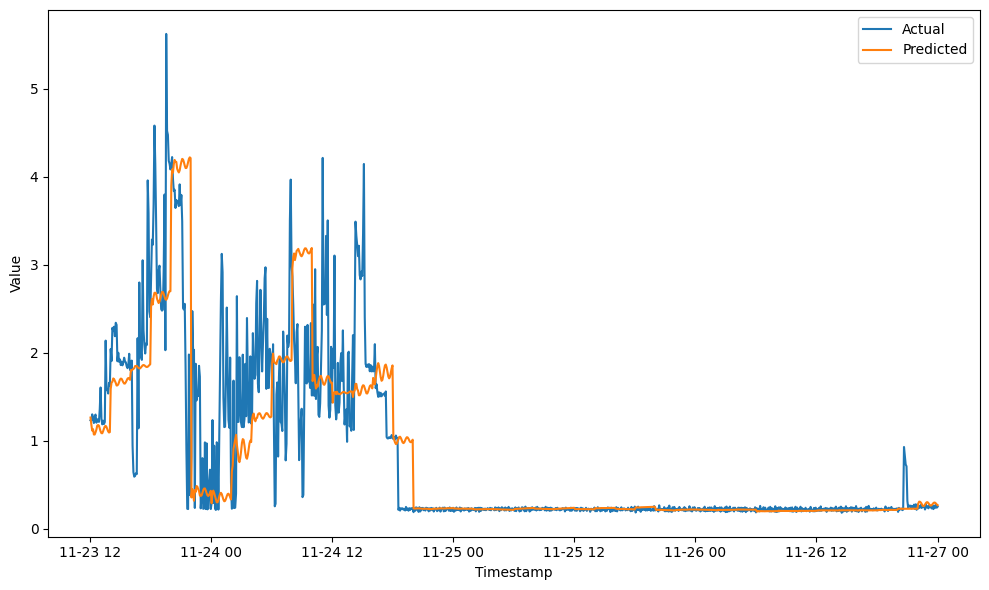

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


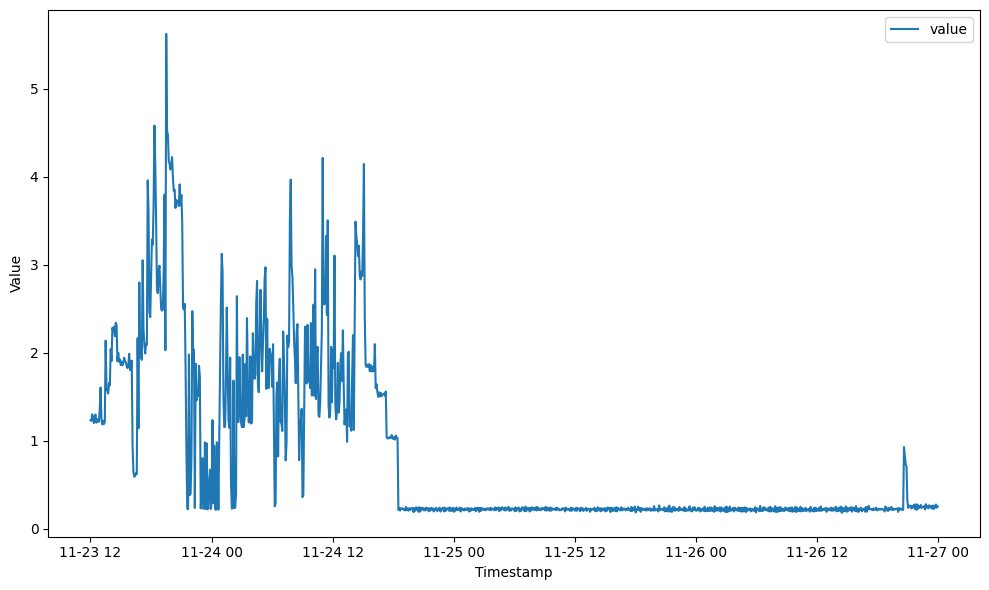

Fold n.2 evaluation result plot:


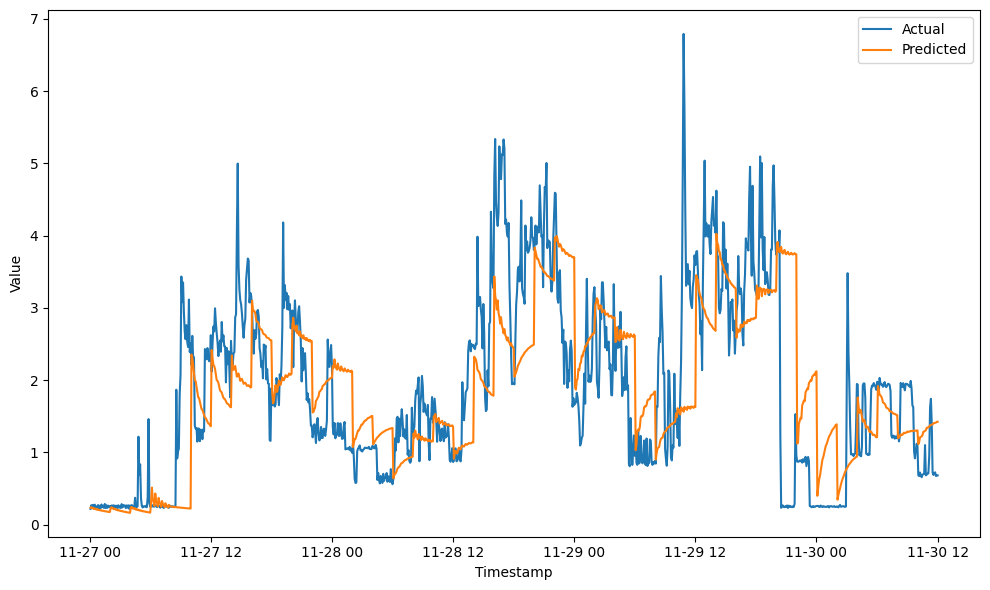

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


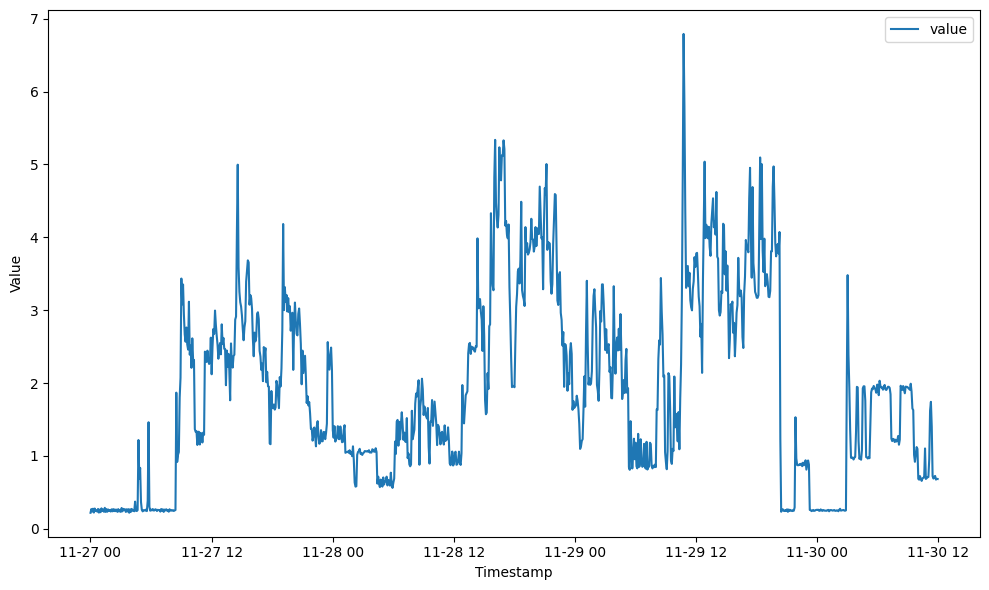

Fold n.3 evaluation result plot:


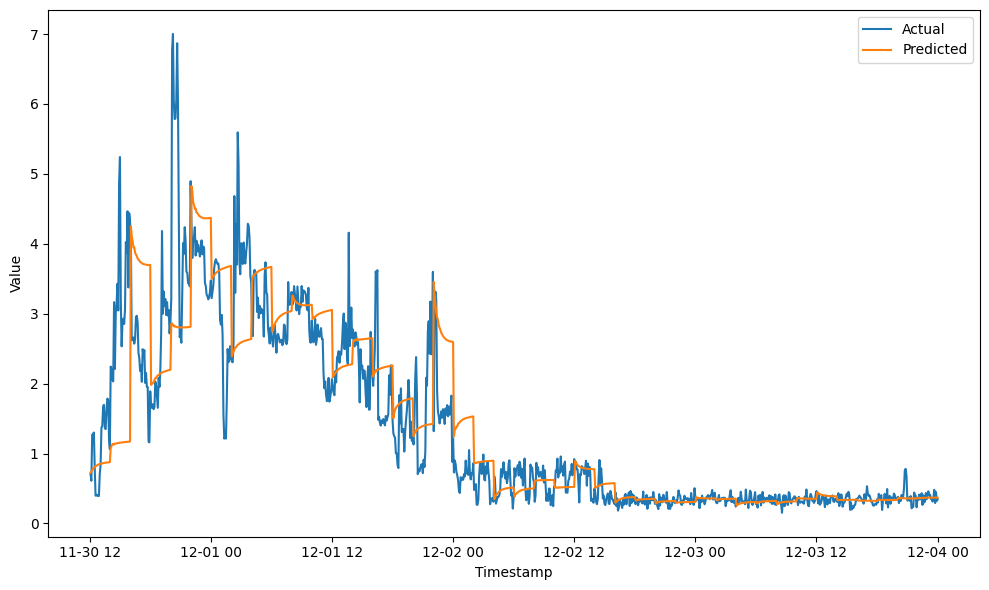

-----------------------------------------



In [13]:
from ts_cross_validation import arima_eval_rolling_ts_cross_validation


arima_rolling_evals_df = arima_eval_rolling_ts_cross_validation(
    arima_model,
    dataset.copy(),
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [14]:
arima_rolling_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.628006,0.394391,34.489441,0.294758,0.588340
Fold 2,1.004734,1.009490,72.972214,0.710095,0.370054
Fold 3,0.742740,0.551663,32.125373,0.422158,0.671682
